In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets with extra lines skipped and correct encoding
gdp_df = pd.read_csv('/content/gdp_per_capita.csv', skiprows=3, encoding='utf-8')
fertility_df = pd.read_csv('/content/fertility_woman.csv', skiprows=3, encoding='utf-8')




In [38]:
# Inspect data structure
print(gdp_df.head())
print(fertility_df.head())

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                  Indicator Name     Indicator Code  1960  \
0  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
1  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
2  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
3  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
4  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   

   1961  1962  1963  1964  1965  ...          2015          2016  \
0   NaN   NaN   NaN   NaN   NaN  ...  37231.918495  37444.441094   
1   NaN   NaN   NaN   NaN   NaN  ...   3502.296662   3595.841041   
2   NaN   NaN   NaN   NaN   NaN  ...   2289.371986

Data Cleaning

In [39]:
# Drop any unnamed columns
gdp_df = gdp_df.drop(columns=[col for col in gdp_df.columns if 'Unnamed' in col])
fertility_df = fertility_df.drop(columns=[col for col in fertility_df.columns if 'Unnamed' in col])

# Display column names to confirm
print(gdp_df.columns)
print(fertility_df.columns)


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988',

In [40]:
#Data melting
gdp_long = gdp_df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP per Capita')
fertility_long = fertility_df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Fertility Rate')

In [41]:
# Check the melted data
print(gdp_long.head())
print(fertility_long.head())

                  Country Name Country Code            Year  \
0                        Aruba          ABW  Indicator Name   
1  Africa Eastern and Southern          AFE  Indicator Name   
2                  Afghanistan          AFG  Indicator Name   
3   Africa Western and Central          AFW  Indicator Name   
4                       Angola          AGO  Indicator Name   

                                  GDP per Capita  
0  GDP per capita, PPP (current international $)  
1  GDP per capita, PPP (current international $)  
2  GDP per capita, PPP (current international $)  
3  GDP per capita, PPP (current international $)  
4  GDP per capita, PPP (current international $)  
                  Country Name Country Code            Year  \
0                        Aruba          ABW  Indicator Name   
1  Africa Eastern and Southern          AFE  Indicator Name   
2                  Afghanistan          AFG  Indicator Name   
3   Africa Western and Central          AFW  Indicator Name   


Filter Data for 2013

In [42]:
# Filter data for the year 2013
gdp_2013 = gdp_long[gdp_long['Year'] == '2013']
fertility_2013 = fertility_long[fertility_long['Year'] == '2013']

In [43]:
# Check filtered data
print(gdp_2013.head())
print(fertility_2013.head())

                      Country Name Country Code  Year GDP per Capita
14630                        Aruba          ABW  2013   36877.014132
14631  Africa Eastern and Southern          AFE  2013    3337.142219
14632                  Afghanistan          AFG  2013     2138.75306
14633   Africa Western and Central          AFW  2013     3971.19977
14634                       Angola          AGO  2013    7566.423051
                      Country Name Country Code  Year Fertility Rate
14630                        Aruba          ABW  2013          2.117
14631  Africa Eastern and Southern          AFE  2013        4.80882
14632                  Afghanistan          AFG  2013          5.696
14633   Africa Western and Central          AFW  2013        5.50635
14634                       Angola          AGO  2013          5.953


In [44]:
# Merge the datasets on 'Country Name' and 'Year'
df_merged = pd.merge(gdp_2013, fertility_2013, on=['Country Name', 'Country Code', 'Year'], how='inner')


In [45]:
# Verify merged data
print(df_merged.head())

                  Country Name Country Code  Year GDP per Capita  \
0                        Aruba          ABW  2013   36877.014132   
1  Africa Eastern and Southern          AFE  2013    3337.142219   
2                  Afghanistan          AFG  2013     2138.75306   
3   Africa Western and Central          AFW  2013     3971.19977   
4                       Angola          AGO  2013    7566.423051   

  Fertility Rate  
0          2.117  
1        4.80882  
2          5.696  
3        5.50635  
4          5.953  


In [46]:
# Fill missing values with column means
# Step 1: Convert columns to numeric to ensure they are not object dtype
df_merged['GDP per Capita'] = pd.to_numeric(df_merged['GDP per Capita'], errors='coerce')
df_merged['Fertility Rate'] = pd.to_numeric(df_merged['Fertility Rate'], errors='coerce')

# Step 2: Fill missing values with column means
df_merged['GDP per Capita'] = df_merged['GDP per Capita'].fillna(df_merged['GDP per Capita'].mean())
df_merged['Fertility Rate'] = df_merged['Fertility Rate'].fillna(df_merged['Fertility Rate'].mean())


In [47]:
# Group by country and calculate average values
country_stats = df_merged.groupby('Country Name')[['GDP per Capita', 'Fertility Rate']].mean().reset_index()
print(country_stats.head())

                  Country Name  GDP per Capita  Fertility Rate
0                  Afghanistan     2138.753060         5.69600
1  Africa Eastern and Southern     3337.142219         4.80882
2   Africa Western and Central     3971.199770         5.50635
3                      Albania    10570.419833         1.69700
4                      Algeria    14527.212323         2.95700


In [48]:
# Check for missing values
print(df_merged.isnull().sum())

# Drop rows with missing data for simplicity, or use df_merged.fillna(method='ffill') to fill
df_merged = df_merged.dropna()

Country Name      0
Country Code      0
Year              0
GDP per Capita    0
Fertility Rate    0
dtype: int64


In [49]:
# Verify cleaned data
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Year            266 non-null    object 
 3   GDP per Capita  266 non-null    float64
 4   Fertility Rate  266 non-null    float64
dtypes: float64(2), object(3)
memory usage: 10.5+ KB
None


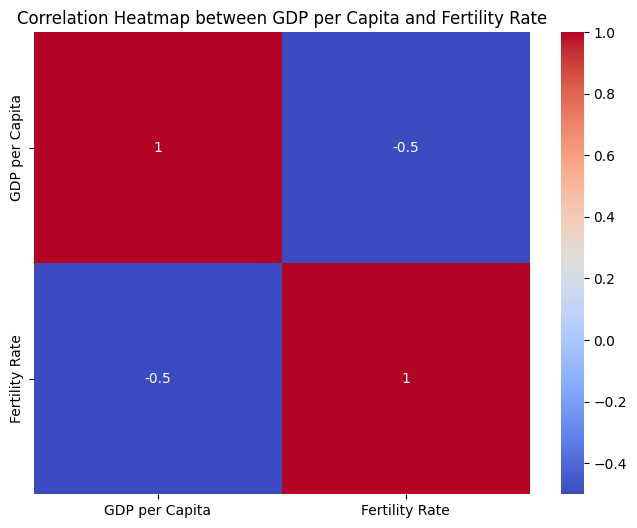

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
correlation = df_merged[['GDP per Capita', 'Fertility Rate']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap between GDP per Capita and Fertility Rate")
plt.show()


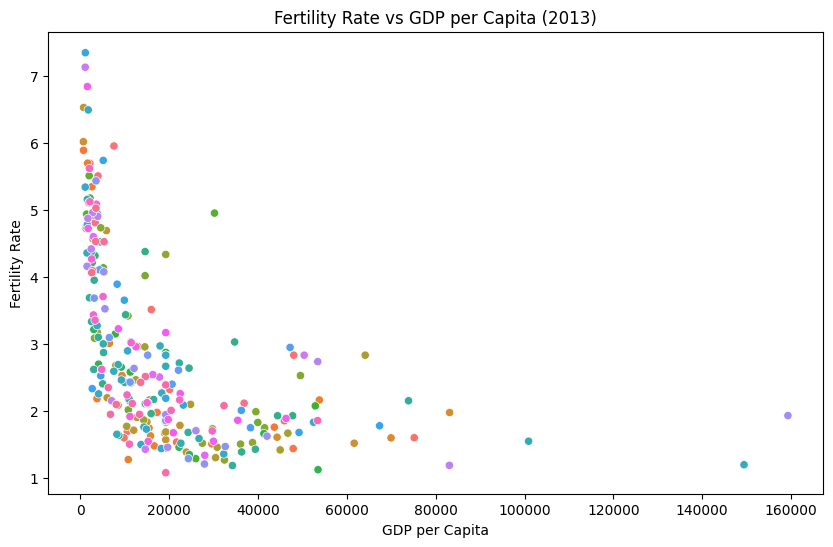

In [51]:
# Plot fertility rate against GDP per capita
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='GDP per Capita', y='Fertility Rate', hue='Country Name', legend=False)
plt.title("Fertility Rate vs GDP per Capita (2013)")
plt.xlabel("GDP per Capita")
plt.ylabel("Fertility Rate")
plt.show()
